## A06: Agent-Based Model: Thomas Schelling's Segregation Model

In 1971 Thomas Schelling published “Dynamic Models of Segregation,” which proposes a simple model of racial segregation. The Schelling model of the world is a grid; each cell represents a house. The houses are occupied by two kinds of “agents,” labeled red and blue, in roughly equal numbers. About 10% of the houses are empty.

At any point in time, an agent might be happy or unhappy, depending on the other agents in its immediate neighborhood. The neighborhood of each house is the set of eight adjacent cells. In one version of the model, agents are happy if they have at least two neighbors like themselves, and unhappy if they have one or zero.

The simulation proceeds by choosing an agent at random and checking to see whether it is happy. If so, then nothing happens; if not, the agent chooses one of the unoccupied cells at random and moves.

Schelling demonstrated his model with coins on a chess =board. We get the privilege to use a computer. 

The class below is one implementation of the basics of this simulation. (You are welcome to use this one, but you are also welcome to change it, or indeed make your own).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def segindex(self):
        n = self.size*self.size
        happyRacist = 0
        for i in range(self.size):
            for j in range(self.size):
                if self.numberKin(i,j) >= self.threshold:
                    happyRacist += 1
        return happyRacist/n
           

In [3]:
def run(threshold):
    c = City(50,[0.45,0.1,0.45],threshold)
    moves = 1000000
    c.show()
    for i in range(moves):
        c.step()
    c.show()

In [4]:
def run2(threshold):
    c = City(50,[0.45,0.1,0.45],threshold)
    moves = 1000000
    indeces = np.zeros(10000)
    stepMarker = np.zeros(10000)
    indecesStepper = 0
    for i in range(moves):
        c.step()
        if i % 100 == 0:
            indeces[indecesStepper] = c.segindex()
            stepMarker[indecesStepper] = i
            indecesStepper += 1
    plt.plot(stepMarker, indeces, color = "black")
    plt.ylabel("% Happy")
    plt.xlabel("Time")
    plt.show()

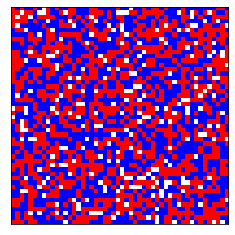

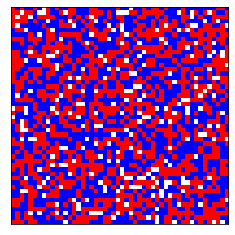

In [5]:
run(0)

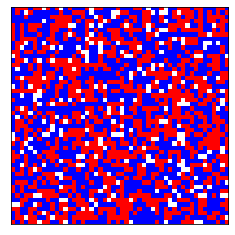

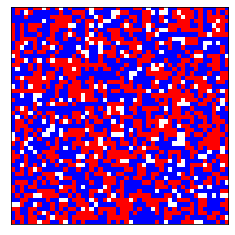

In [6]:
run(1)

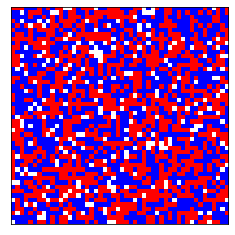

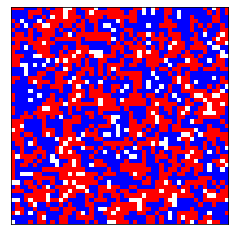

In [7]:
run(2)

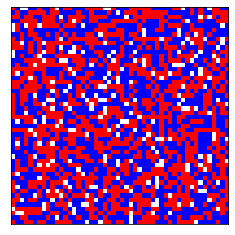

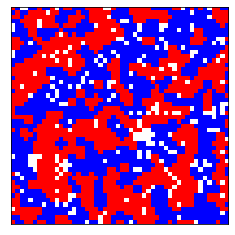

In [8]:
run(3)

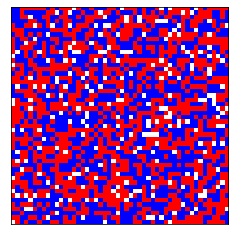

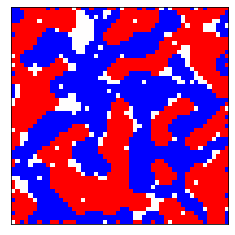

In [9]:
run(4)

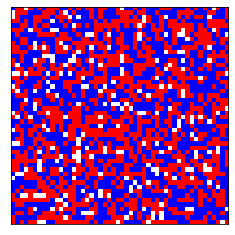

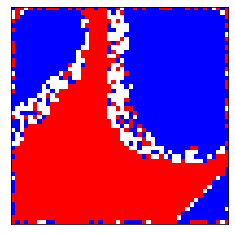

In [10]:
run(5)

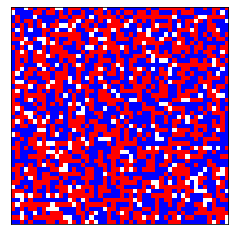

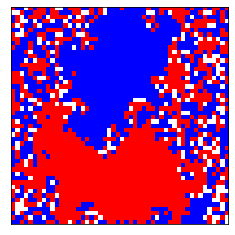

In [11]:
run(6)

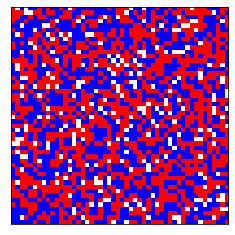

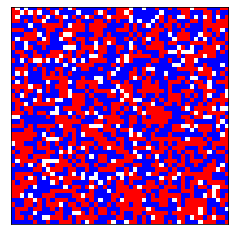

In [12]:
run(7)

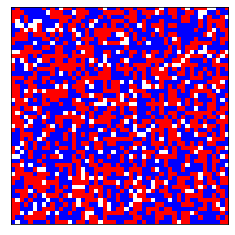

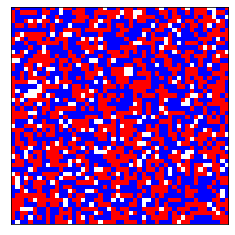

In [13]:
run(8)

1. (3 points) What happens when the agents become more/less tolerant? Show the final outcome for each different threshold of happiness. Interpret your results (as in, explain what you get for threshold = 0, 1, 2, ... 8 and why you think you see the results that you see). 

**When looking at the different tolerance levels, we can see with increasing amount of desired neighbors with a similar state, we see increasing levels of agents grouping together in increasingly dense ways. After a certain level of tolerance, it reaches a point where more time and space is necessary to be able to show the levels of segregation that are modeled with this type of behavior. Basically, their standards are to high for the confines of the city. I left the time at the given constant just so that running the notebook wouldn't take any longer than it already takes.**

2. (3 points) Define a statistic that measures the degree of segregation. Add this as a method to the class. Call the method segindex(). Plot this statistic over time. Plot it for one threshold of your choice.

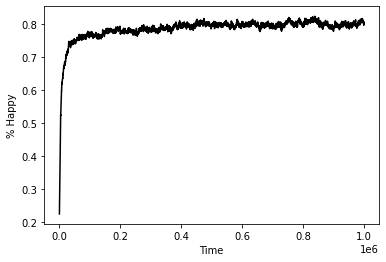

In [14]:
run2(5)

3. (3 points) Let's revisit the first question but now using this more succint measurement. How does the tolerance or threshold of happiness affect the final segregation index? To answer this question, plot the final segregation threshold as a function of threshold. Does your segregation index capture well the results that you observed from your experiment in question 1? If not, fix your segregation index so that it does. Interpret your results.

In [15]:
def runAll():
    finalIndeces = np.zeros(9)
    for t in range (9):
        c = City(50,[0.45,0.1,0.45],t)
        moves = 1000000
        for i in range(moves):
            c.step()        
        finalIndeces[t] = c.segindex()
    plt.plot(finalIndeces, color = "black")
    plt.ylabel("% Happy")
    plt.xlabel("Tolerance")
    plt.show()

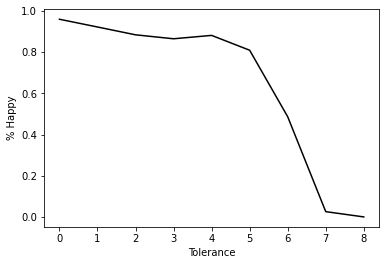

In [16]:
runAll()

4. (3 points) Now that your segregation index works well, let's ask more questions about this model to understand it better. Let's discuss the role of vacant homes: How does vacancy affect the final segregation index of the city? To answer this question, pick a threshold and keep it fixed, and instead vary the proportion of vacancies systematically from 0 to 1. Make sure you make a hypothesis and even write it down, before you run your experiment. Did what you think would happen happened? Explain whether your prediction matched the results.

**Using the model with tolerance level of 4, I believe with an increased number of vacancy, we will see more and more segregation being seperated by vast expanses of vancancies as the proportion of vacancy continues to grow. Additionally, I have modeled with with tolerance level of 8 to see if the number of % happy has changed with additional vacancies. If my guess is correct, additional vacancy should make more intolerant groups happier.**

In [17]:
def vacancyOverTime(tolerance, vacancyLevel):
    c = City(50,[(1-vacancyLevel)/2,vacancyLevel,(1-vacancyLevel)/2],tolerance)
    moves = 1000000
    print("Tolerance Level: " + str(tolerance) + " Vacancy Level: " + str(vacancyLevel))
    c.show()
    for i in range(moves):
        c.step()
    c.show()

Tolerance Level: 4 Vacancy Level: 0.1


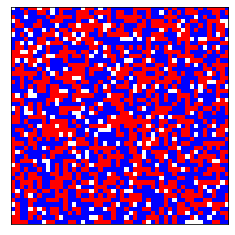

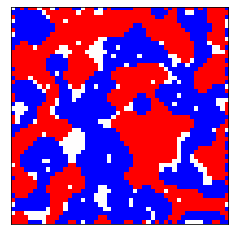

In [18]:
vacancyOverTime(4, 0.1)

Tolerance Level: 4 Vacancy Level: 0.2


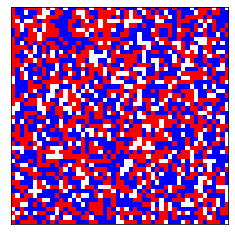

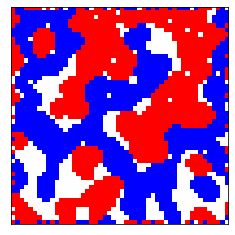

In [19]:
vacancyOverTime(4, 0.2)

Tolerance Level: 4 Vacancy Level: 0.3


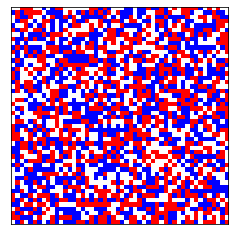

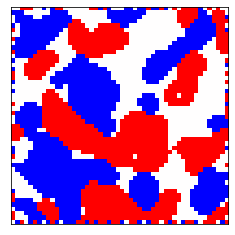

In [20]:
vacancyOverTime(4, 0.3)

Tolerance Level: 4 Vacancy Level: 0.4


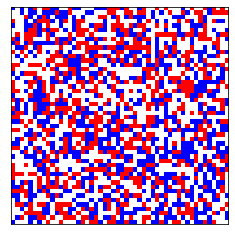

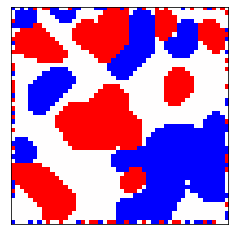

In [21]:
vacancyOverTime(4, 0.4)

Tolerance Level: 4 Vacancy Level: 0.5


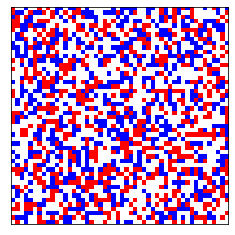

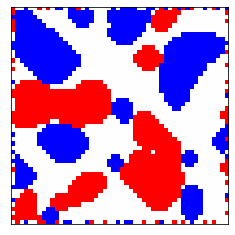

In [22]:
vacancyOverTime(4, 0.5)

Tolerance Level: 4 Vacancy Level: 0.6


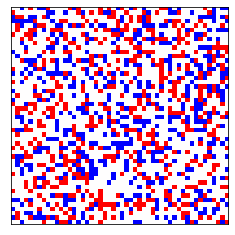

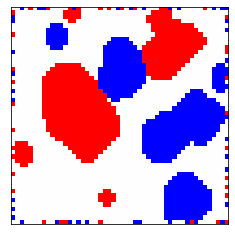

In [23]:
vacancyOverTime(4, 0.6)

Tolerance Level: 4 Vacancy Level: 0.7


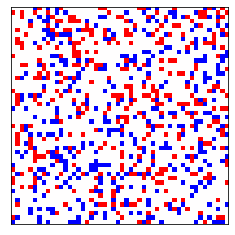

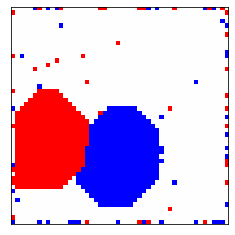

In [24]:
vacancyOverTime(4, 0.7)

Tolerance Level: 4 Vacancy Level: 0.8


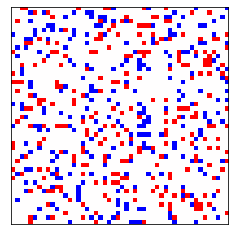

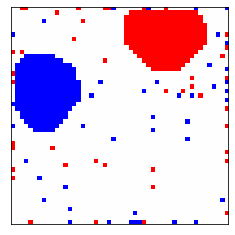

In [25]:
vacancyOverTime(4, 0.8)

Tolerance Level: 4 Vacancy Level: 0.9


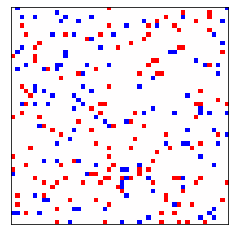

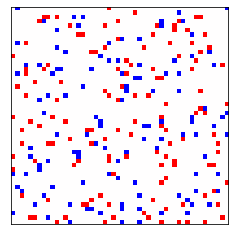

In [26]:
vacancyOverTime(4, 0.9)

In [27]:
def vacancyOnToleranceLevel(tolerance):
    finalIndeces = np.zeros(10)
    percentVacancy = np.zeros(10)
    for t in range(1, 10):
        vacancyLevel = t * 0.1
        c = City(50,[(1-vacancyLevel)/2, vacancyLevel, (1-vacancyLevel)/2],tolerance)
        moves = 1000000
        for i in range(moves):
            c.step()        
        finalIndeces[t] = c.segindex()
        percentVacancy[t] = t * 0.1
    plt.plot(percentVacancy, finalIndeces, color = "black")
    plt.ylabel("% Happy")
    plt.xlabel("Percent of Vacancy")
    plt.show()

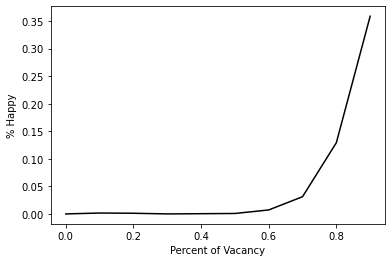

In [28]:
vacancyOnToleranceLevel(8)

**As you can see, with increased vacancy, there is a greater level of happiness in environments where the tolerance is at a higher value, which means that the number of kin needs to be higher. But, as vacancy becomes greater, it's harder for agents to find one another and form communities of like-minded attributes when their movements is random.**

5. (8 points) Open ended. Select one way to extend/modify the model. Find a question to ask about the model (like the questions before this one). Answer your question with an experiment and visualize it with a figure. Interpret and discuss your results.

**In this new model, I wanted to add a new group to see how they'd have an impact on happiness in more vacant models**

In [29]:
class City2():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,0.5,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def segindex(self):
        n = self.size*self.size
        happyRacist = 0
        for i in range(self.size):
            for j in range(self.size):
                if self.numberKin(i,j) >= self.threshold:
                    happyRacist += 1
        return happyRacist/n
           

In [30]:
def run3(threshold):
    c = City2(50,[0.3,0.1,0.3,0.3],threshold)
    moves = 1000000
    c.show()
    for i in range(moves):
        c.step()
    c.show()

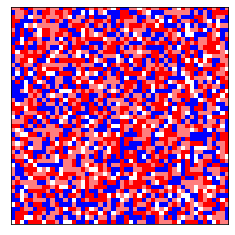

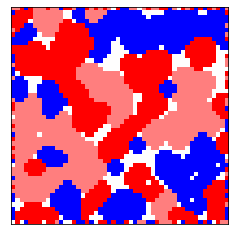

In [31]:
run3(4)

In [32]:
def vacancyOverTime2(tolerance, vacancyLevel):
    c = City2(50,[(1-vacancyLevel)/3,vacancyLevel,(1-vacancyLevel)/3,(1-vacancyLevel)/3],tolerance)
    moves = 1000000
    print("Tolerance Level: " + str(tolerance) + " Vacancy Level: " + str(vacancyLevel))
    c.show()
    for i in range(moves):
        c.step()
    c.show()

Tolerance Level: 4 Vacancy Level: 0.1


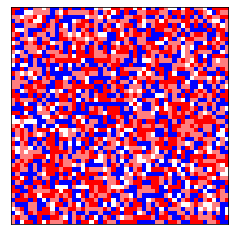

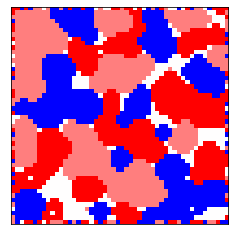

Tolerance Level: 4 Vacancy Level: 0.2


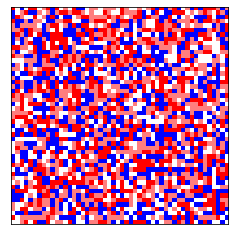

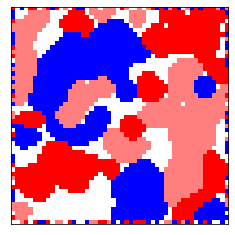

Tolerance Level: 4 Vacancy Level: 0.30000000000000004


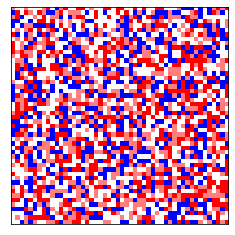

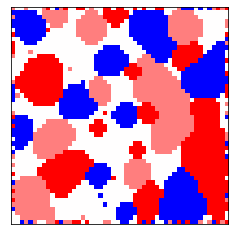

Tolerance Level: 4 Vacancy Level: 0.4


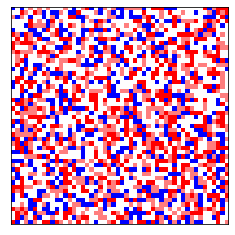

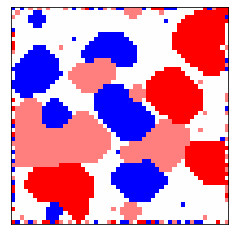

Tolerance Level: 4 Vacancy Level: 0.5


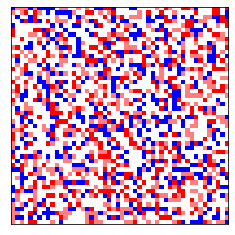

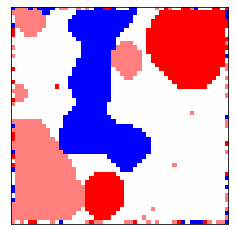

Tolerance Level: 4 Vacancy Level: 0.6000000000000001


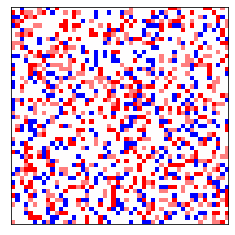

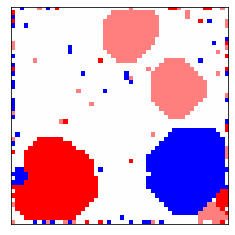

Tolerance Level: 4 Vacancy Level: 0.7000000000000001


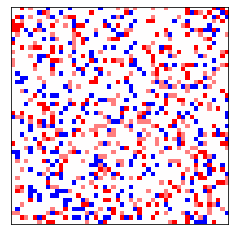

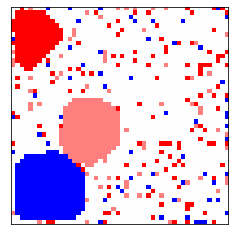

Tolerance Level: 4 Vacancy Level: 0.8


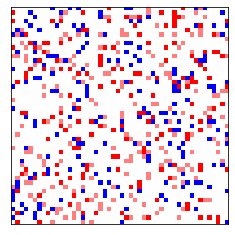

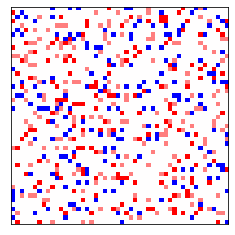

Tolerance Level: 4 Vacancy Level: 0.9


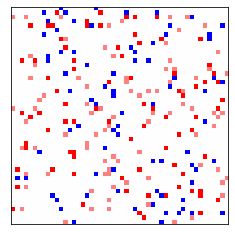

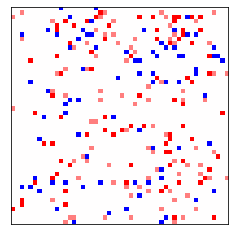

In [33]:
for i in range(1,10):
    vacancyOverTime2(4, float(i)*0.1)

In [34]:
def vacancyOnToleranceLevel2(tolerance):
    finalIndeces = np.zeros(10)
    percentVacancy = np.zeros(10)
    for t in range(1, 10):
        vacancyLevel = t * 0.1
        c = City2(50,[(1-vacancyLevel)/3,vacancyLevel,(1-vacancyLevel)/3,(1-vacancyLevel)/3],tolerance)
        moves = 1000000
        for i in range(moves):
            c.step()        
        finalIndeces[t] = c.segindex()
        percentVacancy[t] = t * 0.1
    plt.plot(percentVacancy, finalIndeces, color = "black")
    plt.ylabel("% Happy")
    plt.xlabel("Percent of Vacancy")
    plt.show()

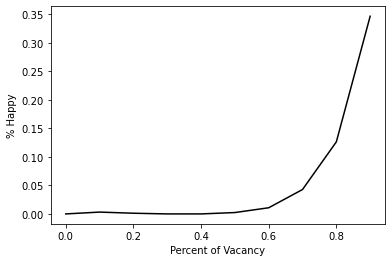

In [35]:
vacancyOnToleranceLevel(8)

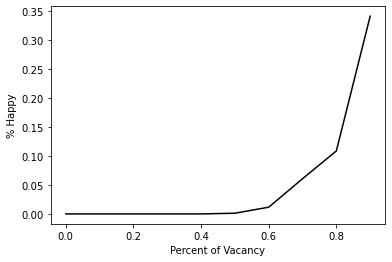

In [36]:
vacancyOnToleranceLevel2(8)

**After designing a class with three different groups, I decided to see how different levels of vacancy impacted the model and compared it to the model with only two different groups of agents. As you can see, the % Happy remains about the same. So, it seems when increasing diversity of ideas, if the tolerance level is still high, capacity doesn't really change.**